<a href="https://colab.research.google.com/github/q-Mante/CarFuelEconomy-LinearRegression/blob/main/Cars_Fuel_Economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Importing libraries

In [96]:
import pandas as pd
import numpy as np

Loading data table

In [97]:
data_df = pd.read_csv("https://raw.githubusercontent.com/q-Mante/CarFuelEconomy-LinearRegression/main/auto-mpg.data.csv", delimiter=';')
data_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


Seperating independent variables (couldn't solve convertion from string to float at "Car Name" so I drop it entirely)

In [98]:
x = data_df.drop(["MPG","Car Name"], axis = 1).values
x

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

Seperating dependent variables

In [99]:
y = data_df["MPG"].values
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

Importing linear model from sklearn

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [101]:
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, HuberRegressor
reg = LinearRegression(fit_intercept = False)
reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [102]:
reg.coef_

array([-0.31894994,  0.00620604, -0.02033067, -0.00587118, -0.00767472,
        0.55733458,  0.92670307])

In [103]:
reg.intercept_

0.0

In [104]:
y_pred = reg.predict(x_test)

Evalution metric

In [105]:
from sklearn.metrics import r2_score
rez = r2_score(y_test, y_pred)
print(rez)

0.8087563474149766


Some other metrics

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.5135212502766353
Mean Squared Error: 10.645049907605115
Root Mean Squared Error: 3.262675268488287


Visualizing prediction accuracy

Text(0, 0.5, 'Predicted')

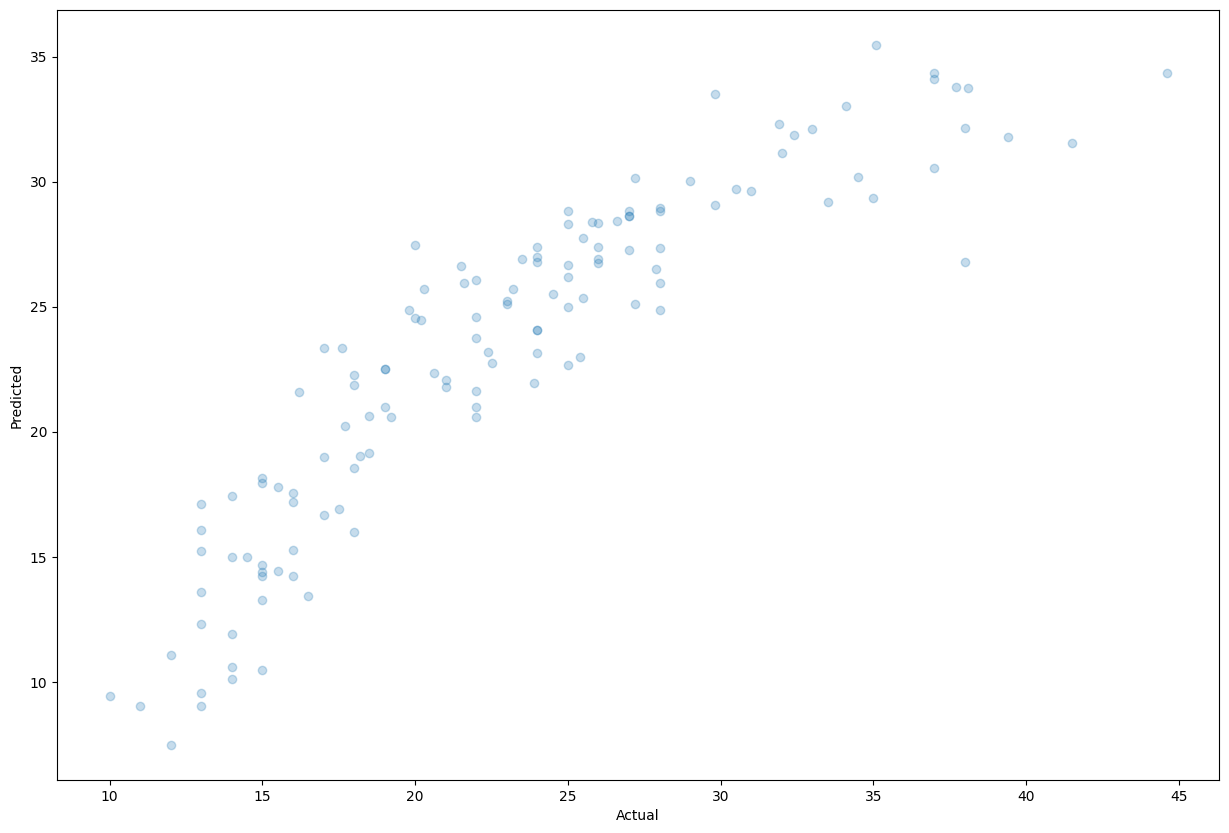

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [108]:
pred_y_diff = pd.DataFrame({"Actual values" : y_test, "Predicted values" : y_pred, "Difference" : y_test - y_pred})
pred_y_diff

,Actual values,Predicted values,Difference
0,17.0,16.684248,0.315752
1,39.4,31.784678,7.615322
2,16.0,14.225786,1.774214
3,24.0,26.791227,-2.791227
4,28.0,28.936340,-0.936340
...,...,...,...
125,25.5,25.328717,0.171283
126,26.0,27.369616,-1.369616
127,22.5,22.732804,-0.232804
128,17.6,23.354314,-5.754314


# **Non Linear Regressions**

In [109]:
from sklearn.svm import SVR
reg = SVR(kernel = "rbf", C = 145)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.7302755356109862


Text(0, 0.5, 'Predicted')

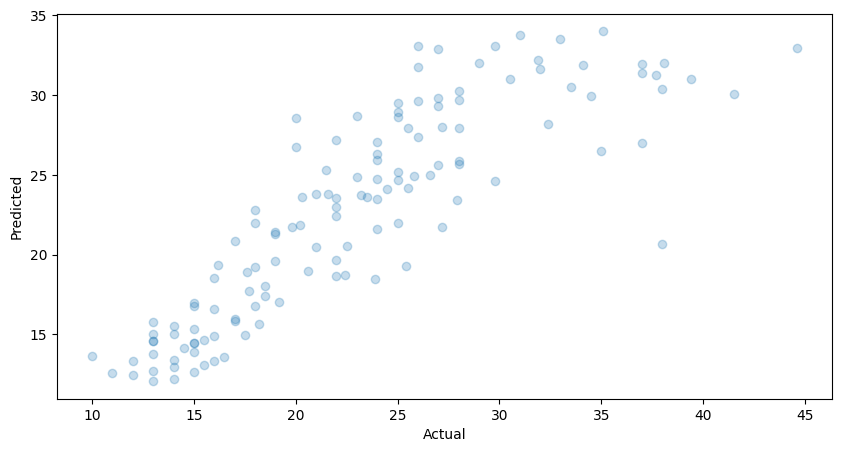

In [110]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [111]:
from sklearn.neighbors import KNeighborsRegressor
#https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression
neigh = KNeighborsRegressor(n_neighbors = 5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.683575403396717


Text(0, 0.5, 'Predicted')

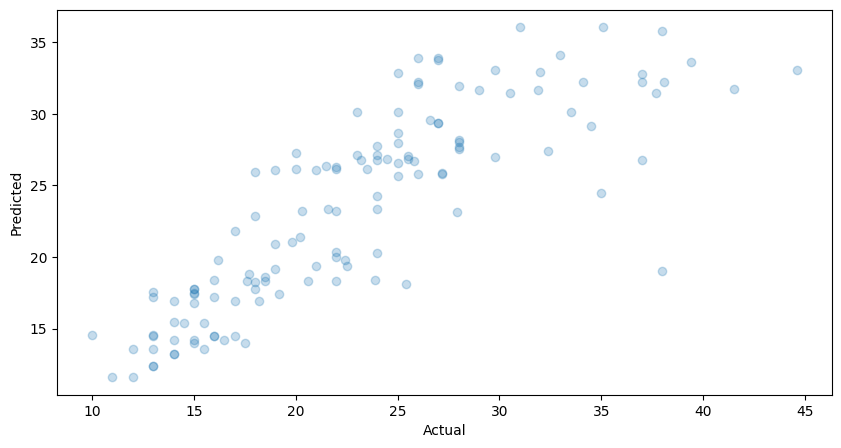

In [112]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [113]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.7614374968959016


Text(0, 0.5, 'Predicted')

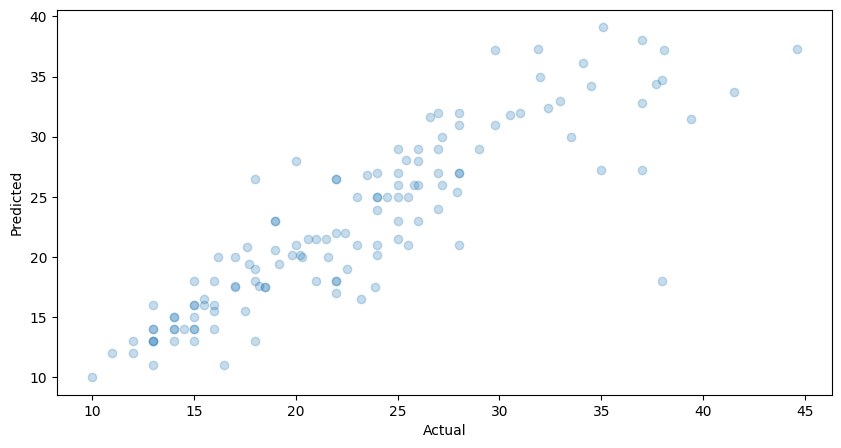

In [114]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [115]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 50, random_state = 0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.8447175040978353


Text(0, 0.5, 'Predicted')

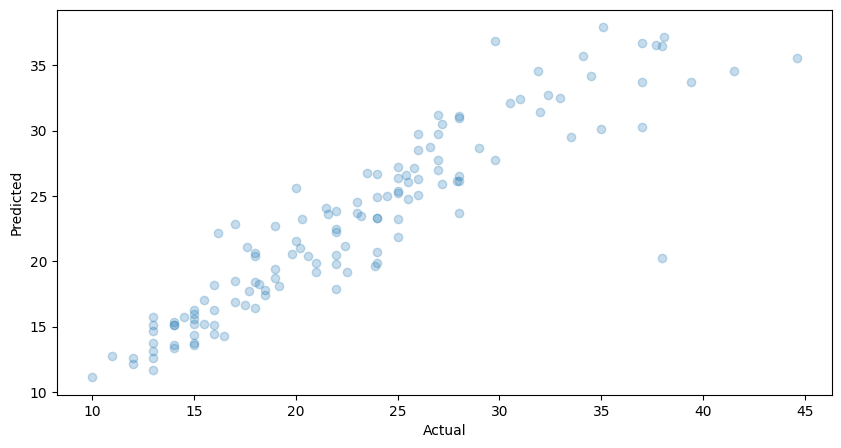

In [116]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training Regressors
reg1 = GradientBoostingRegressor(random_state = 1)
reg2 = RandomForestRegressor(max_depth = 50, random_state = 1)
reg3 = KNeighborsRegressor(n_neighbors = 6)
ereg = VotingRegressor(estimators = [("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg = ereg.fit(x_train, y_train)
y_pred = ereg.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.8279919137444132


Text(0, 0.5, 'Predicted')

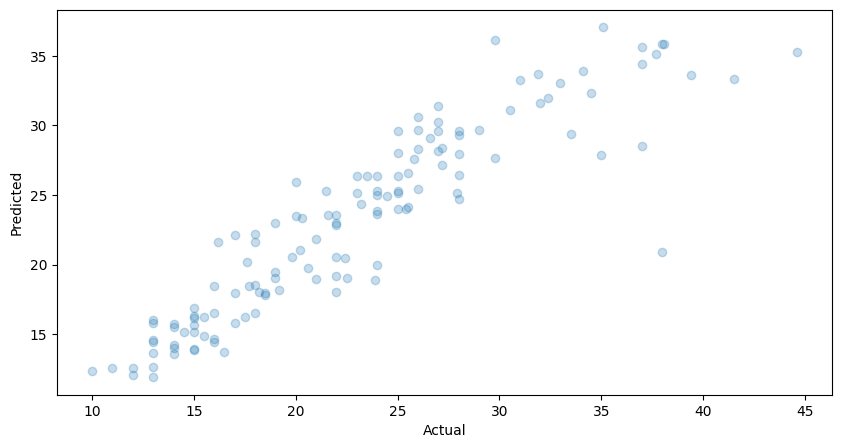

In [118]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [119]:
from sklearn.neural_network import MLPRegressor
MLPregr = MLPRegressor(hidden_layer_sizes = (50, 10, 2, ), activation = "identity", random_state = 1, max_iter = 2500, solver = "lbfgs")
MLPregr.fit(x_train, y_train)
y_pred = MLPregr.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.7928655252340575


Text(0, 0.5, 'Predicted')

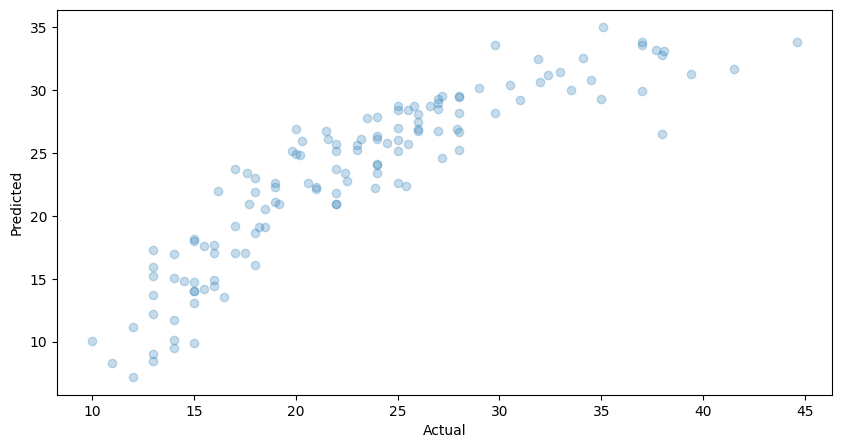

In [120]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# **Hyper Parameter Tuning**

https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/

In [121]:
param_grid = {
    "hidden_layer_sizes" : [(50, 10), (50, 10, 2, ), (10, 10, )],
    "activation" : ["identity", "relu"],
    "alpha" : [0.0001, 0.00005],
    "learning_rate" : ["constant"],
}

In [122]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLPregr, param_grid, n_jobs = -1, cv = 5, verbose = 2)
grid.fit(x_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'constant'}


In [123]:
y_pred = grid.predict(x_test)

rez = r2_score(y_test, y_pred)
print(rez)

0.8349050870954704


Text(0, 0.5, 'Predicted')

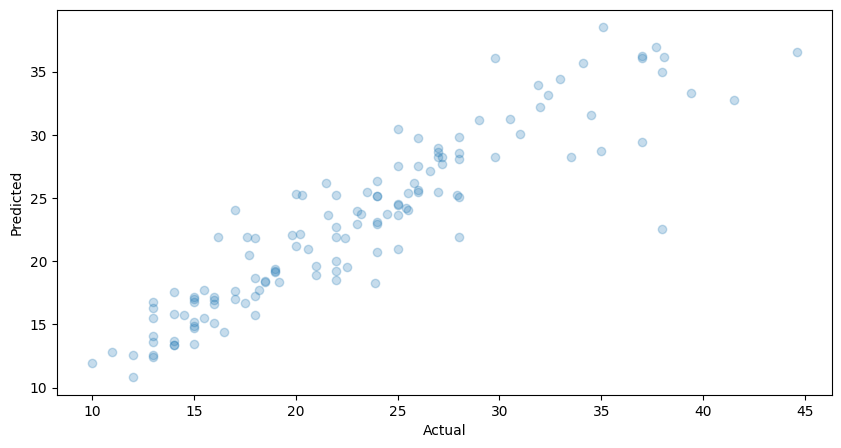

In [124]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_pred, alpha = 0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")